In [25]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,Customer Name,Products
0,John Smith,"Laptop,Smartphone"
1,Emma Johnson,"Headphones,Tablet"
2,Michael Brown,"Smartwatch,Bluetooth Speaker"
3,Jennifer Davis,"Desktop Computer,Wireless Earbuds"
4,William Wilson,"TV,Game Console,Printer"


In [26]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['Products'] = df['Products'].str.replace('、', ',').str.split(',')

In [27]:
from collections import defaultdict

# 创建关键字与ID之间的映射对照表
name_to_products = defaultdict(list)
products_to_name = defaultdict(list)

# 假设df是您的数据框架，然后迭代每一行
for index, row in df.iterrows():
    customer_name = row['Customer Name']  # 获取顾客姓名
    products = [product.strip() for product in row['Products']]  # 提取产品列表并去除空格

    # 将顾客姓名与其购买的产品建立映射关系
    name_to_products[customer_name].extend(products)

    # 将产品与购买它的顾客姓名建立映射关系
    for product in products:
        products_to_name[product].append(customer_name)


In [28]:
products_to_name

defaultdict(list,
            {'Laptop': ['John Smith'],
             'Smartphone': ['John Smith'],
             'Headphones': ['Emma Johnson'],
             'Tablet': ['Emma Johnson'],
             'Smartwatch': ['Michael Brown'],
             'Bluetooth Speaker': ['Michael Brown'],
             'Desktop Computer': ['Jennifer Davis'],
             'Wireless Earbuds': ['Jennifer Davis'],
             'TV': ['William Wilson', 'Mia Lewis'],
             'Game Console': ['William Wilson'],
             'Printer': ['William Wilson', 'Sophia Jackson'],
             'Action Camera': ['Emily Taylor'],
             'Portable Charger': ['Emily Taylor'],
             'Smart Home Hub': ['Daniel Martinez'],
             'Wireless Mouse': ['Daniel Martinez'],
             'Kindle': ['Olivia Anderson'],
             'Bluetooth Headset': ['Olivia Anderson'],
             'Guitar': ['Olivia Anderson'],
             'Security Camera': ['James Thomas'],
             'Wireless Charger': ['James Thomas'],

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
G = nx.Graph()

# 加點
for customer_name in name_to_products:
    G.add_node(customer_name, type='Customer')

for products in products_to_name:
    G.add_node(products, type='Products')

# 加邊
for customer_name, products in name_to_products.items():
    for products in products:
        G.add_edge(customer_name, products)
        


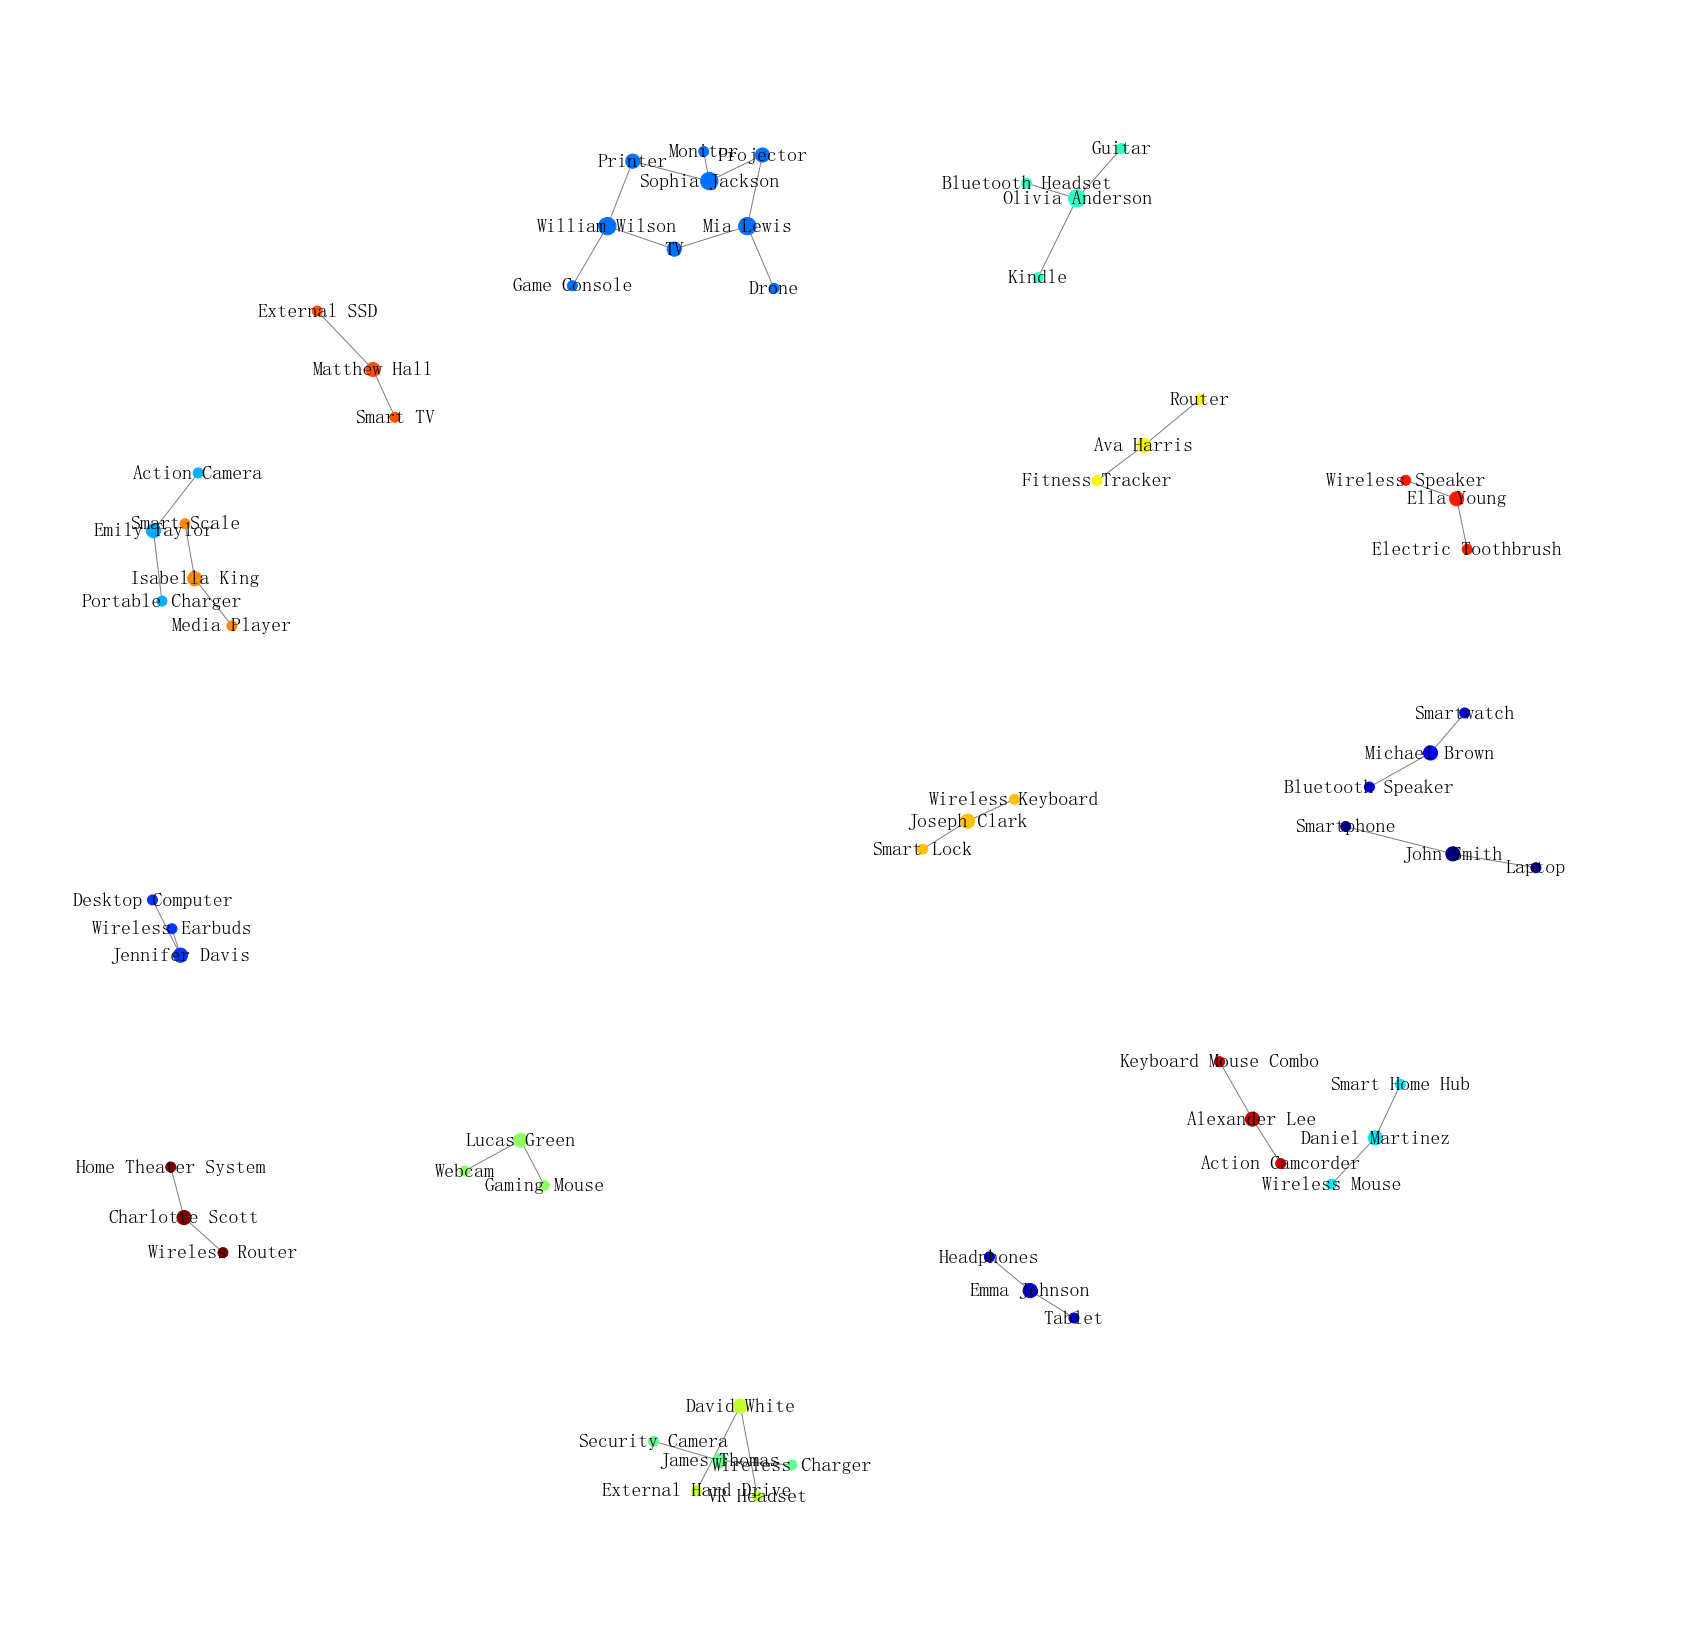

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = {node: partition[node] for node in G.nodes()}
values = [community_colors[node] for node in G.nodes()]

node_sizes = [100 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()